In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [7]:
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from time import *
from sklearn import metrics

In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('day.csv', parse_dates=['dteday'], date_parser=dateparse)

### Data Statistics

In [9]:
df.shape

(731, 16)

In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [13]:
df.describe

<bound method NDFrame.describe of      instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
5          6 2011-01-06       1   0     1        0        4           1   
6          7 2011-01-07       1   0     1        0        5           1   
7          8 2011-01-08       1   0     1        0        6           0   
8          9 2011-01-09       1   0     1        0        0           0   
9         10 2011-01-10       1   0     1        0        1           1   
10        11 2011-01-11       1   0     1        0        2           1   
11        12 2011-01-12       1   0     1        0        3       

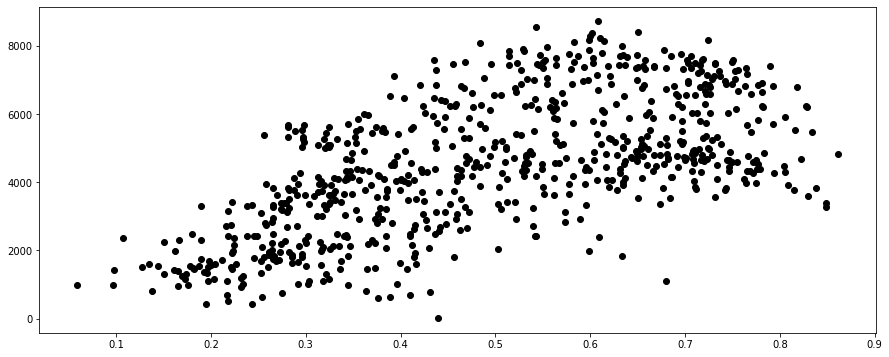

In [55]:
plt.plot(df['temp'], df['cnt'], 'o', color='black');

Correlation between features temp and cnt

In [56]:
df['temp'].corr(df['cnt'])

0.627494009033492

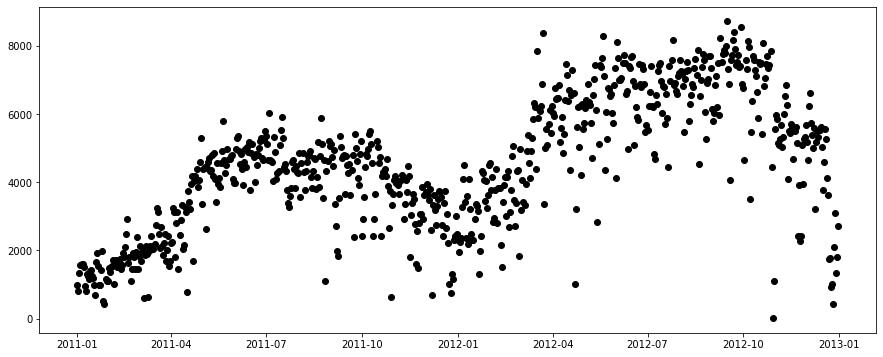

In [57]:
plt.plot(df['dteday'], df['cnt'], 'o', color='black')

Correlation between features dteday and cnt

### Creating a category object (pd.categorical)

In [58]:
df['season_cat'] = pd.Categorical(df['season'])

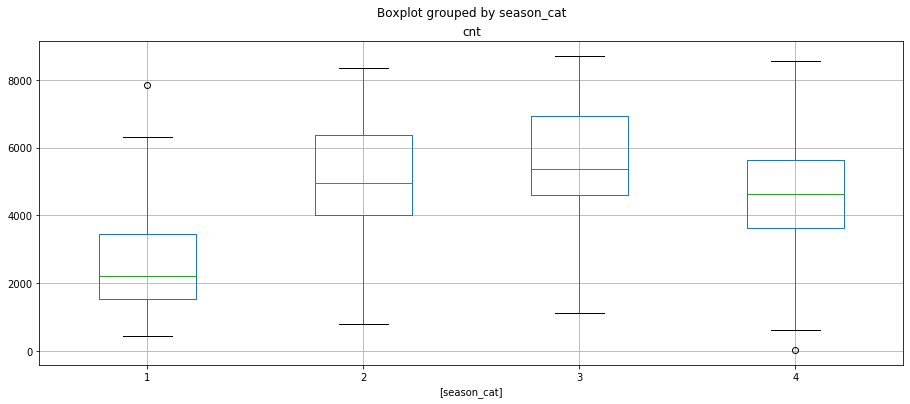

In [59]:
df[['season_cat', 'cnt']].boxplot(by = 'season_cat')

### Plotting few features against each other and checking their correlation

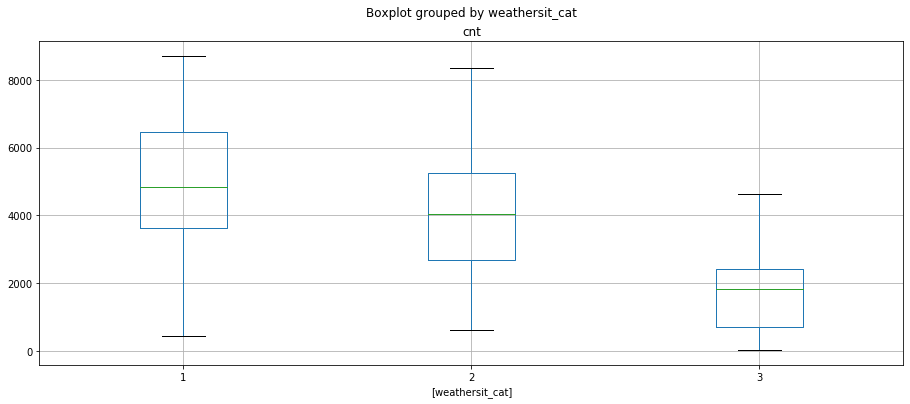

In [60]:
df['weathersit_cat'] = pd.Categorical(df['weathersit'])
df[['weathersit_cat', 'cnt']].boxplot(by = 'weathersit_cat')

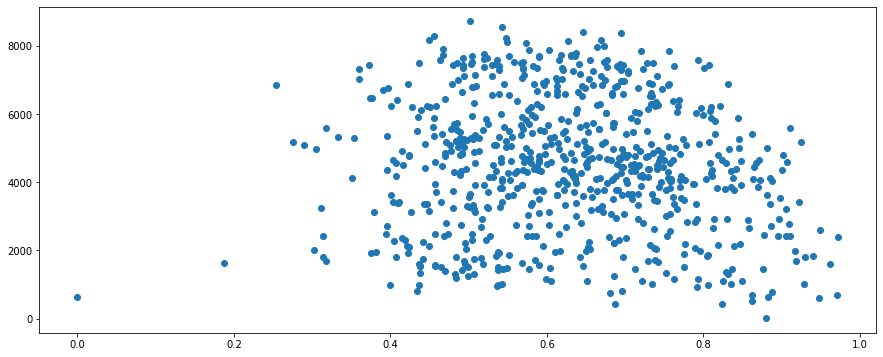

In [61]:
plt.plot(df['hum'], df['cnt'], 'o')

In [62]:
df['hum'].corr(df['cnt'])

-0.10065856213715534

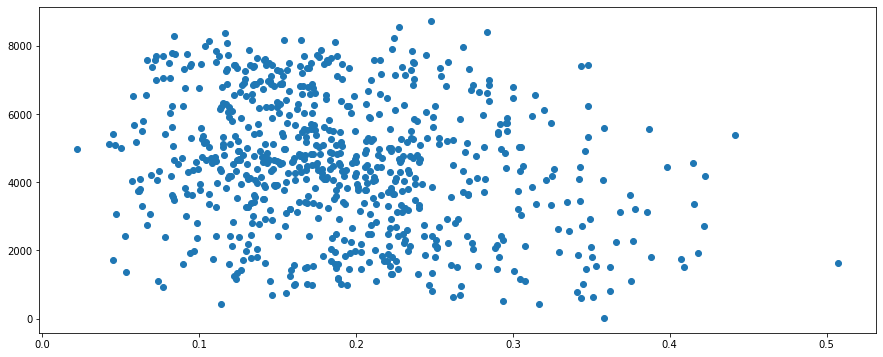

In [63]:
plt.plot(df['windspeed'], df['cnt'], 'o')

In [64]:
df['windspeed'].corr(df['cnt'])

-0.23454499742167012

In [65]:
df['dteday'] = df['dteday'].map(datetime.toordinal)

In [66]:
dates = df['dteday']
dates = (dates-dates.min())/(dates.max()-dates.min())
df['dteday'] = dates

In [67]:
dates = df['yr']
dates = (dates-dates.min())/(dates.max()-dates.min())
df['yr'] = dates

In [68]:
df['dteday'].corr(df['cnt'])

0.6288302722083066

In [69]:
df['season'].corr(df['temp'])

0.33431485639909475

In [70]:
def cost_function(X, Y, Z):
    length = len(Z)
    result = np.sum((X.dot(Z) - Y) ** 2)
    result = result / (2 * length)
    return result

In [71]:
def RMSE(X, Y, Z):
    length = len(Y)
    result = np.sum((X.dot(Z).astype(int) - Y) ** 2)    
    result = result**0.5
    result = result / (2 * length)
    return result

In [72]:
def R_squared(X, Y, Z):
  mean = np.mean(Y)
  ssdiff = np.sum((X.dot(Z) - mean)**2)
  ssmeandiff = np.sum((Y - mean)**2)
  return ssdiff/ssmeandiff

In [73]:
def linear_regression(df, features, target):
  
  train_df = df[:int(len(df)*0.7)]
  test_df = df[int(len(df)*0.7):]
  m = len(train_df)
  x0 = np.ones(m)
  X = np.array([x0] + [train_df[x] for x in features]).T
  B = np.array([0] + [0 for x in features])
  Y = np.array(train_df[target])
  alpha = 0.0001
  inital_cost = cost_function(X, Y, B)
  print('Initial cost:', inital_cost)
  newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
#   plot_ROC(Y, X.dot(newB))
  print(newB)
  print('RMSE on train:', RMSE(X, Y, newB))
  print('R squared value on train:', R_squared(X, Y, newB))
#   print(test_df)
  m = len(test_df)
  x0 = np.ones(m)
  X_ = np.array([x0] + [test_df[x] for x in features]).T
  Y_ = np.array(test_df[target])
  print('RMSE on test:', RMSE(X_, Y_, newB))
  print('R squared value on train:', R_squared(X_, Y_, newB))
  return newB

In [74]:
def gradient_descent(X, Y, M, alpha, iterations):
    cost_history = [0] * iterations
    length = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(M)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / length
        M = M - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, M)
        cost_history[iteration] = cost
        
    return M, cost_history

In [75]:
features = ['dteday', 'holiday', 'weekday',
       'workingday', 'hum', 'windspeed']

### Linear Regression for selected features against feature 'cnt'

In [76]:
linear_regression(df, features, 'cnt')
print('min count',min(df['cnt']))
print('max count',max(df['cnt']))

Initial cost: 617122806.7142857
[2024.12857882 1982.7386256    39.8303933    59.12865323  425.55837631
  872.20060881  179.87048525]
RMSE on train: 31.493825023731297
R squared value on train: 0.09284089528765853
RMSE on test: 75.46864291909314
R squared value on train: 0.751451533973539
min count 22
max count 8714


### Linear Regression for selected features against feature 'cnt'

In [77]:
features = ['season', 'yr', 'mnth', 'temp', 'weathersit']

In [78]:
linear_regression(df, features, 'cnt')
print('min count',min(df['cnt']))
print('max count',max(df['cnt']))

Initial cost: 719976607.8333334
[1445.91356325  759.03302101 2061.06937797   -7.92474148 1655.87187535
 -478.89947287]
RMSE on train: 22.029837680382563
R squared value on train: 0.4523166935997698
RMSE on test: 47.11257892511518
R squared value on train: 0.17404490604303202
min count 22
max count 8714
